### Contents

1. Linear regression
2. Linear regression with sklearn
3. Evaluation metrics
4. Visualization

# Introduction to Regression

Regression, in the context of statistics and machine learning, refers to a set of techniques used to model the relationship between a dependent variable (target) and one or more independent variables (features).

The goal of regression analysis is to understand the nature of the relationship and make predictions based on the given data. It is a supervised learning approach, where the algorithm learns from labeled training data to predict the outcome for new, unseen data.


Regression problems can be broadly categorized into two types:

* **Linear Regression**: Assumes a linear relationship between the independent variables and the dependent variable.
* **Nonlinear Regression**: Assumes a nonlinear relationship between the variables. Example : Polynomial regression

In both cases, the term “regression” is used because the goal is to model or predict a continuous outcome, as opposed to classification, where the goal is to predict a categorical outcome.



In **Simple Linear Regression**, the term “best fit line” usually refers to a straight line in the case of simple linear regression (one independent variable).

**Notation for the Lineal Regression model**.


We will have a parameter $\textbf{y}$ that depends linearly on several covariates $\textbf{x}_i$:


$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} $$

The $a_i$ terms will be the *parameters* of the model or *coefficients*.

If we write it in matrix form:

$$ \textbf{y}  = X \textbf{w}$$

Where $$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right), 
 X = \left( \begin{array}{c} x_{11}  \dots x_{1m} \\ x_{21}  \dots x_{2m}\\ \vdots \\ x_{n1}  \dots x_{nm} \end{array} \right),
 \textbf{w} = \left( \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right) $$
 
In a **simple linear regression** model that only depends on one variable, we will have:

$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

With a parameter $a_0$ called constant or cut with the ordinate axis.

If we have a **multivariate/multiple linear regression**, we will have:
$$ \textbf{y} = a_1 \textbf{x}_1 + \dots + a_m \textbf{x}_m = X \textbf{w} $$


# 1. Simple Linear Regression

Let's take a look at some examples in graphic form.

We want to predict the weight of a person, using as a independent variable the height. In order to do so, we will create a Simple Linear Regression Model. 

### Height - weight  dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("Data/height-weight-regression.csv")
df.head()

,Index,Height_Inches,Weight_Pounds
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
df.drop(columns=["Index"], inplace=True)

In [6]:
df

,Height_Inches,Weight_Pounds
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Plot the data
    
</div>

In [7]:
## matplotlib and seaborn for visaulizations (seaborn is based on matplotlib)
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

Text(0, 0.5, 'Weight (Pounds)')

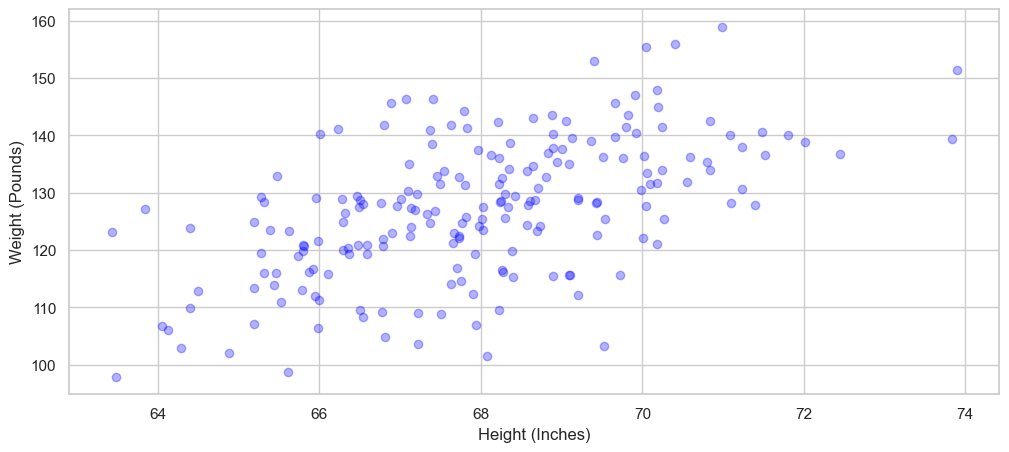

In [8]:
n_samples = 200

x =  df.Height_Inches[:n_samples]
y = df.Weight_Pounds[:n_samples]

plt.plot(x, y, "o", alpha=0.3, color='blue') #being alpha the darkness of the markers
# Add axis labels
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")

### Let's try to find some regression model that fits this datapoints

$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

It is clear that there is a certain correlation between them that we could see with this model:

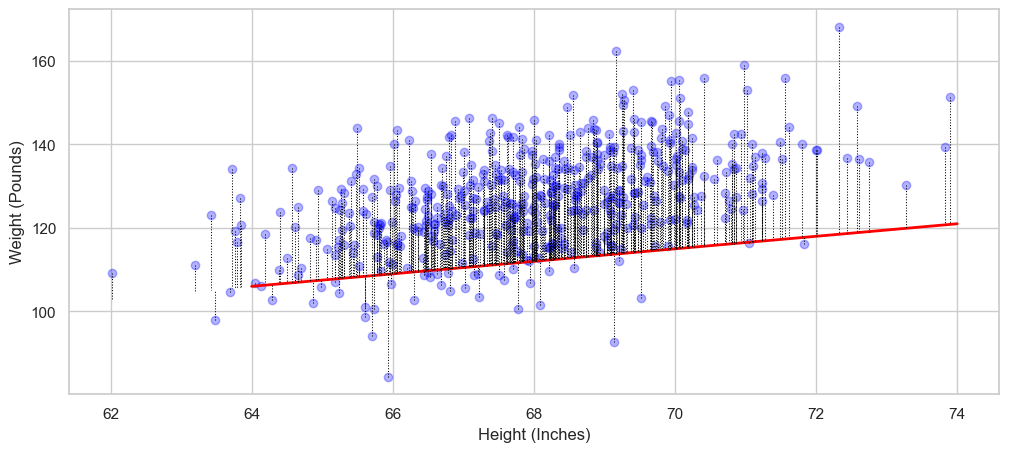

In [36]:

# Setting Model Parameters. Here, a0 and a1 represent the intercept and slope of the line, respectively. 
a0 = 10
a1 = 1.5

# Creating the Model Predictions:
model=[a0 + a1*x for x in np.arange(64,75)] 

#Plotting the Data Points and Model:
plt.plot(x,y, "o", alpha=0.3, color='blue')
plt.plot(np.arange(64,75), model,'r')

# Drawing Error Lines for Each Point:
#zip(a,b) will create a tuple of (a,b) pairs, where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, a0 + a1*xi], "k:", linewidth=0.75) # plot errors with black markers (k) connected by a dotted line (":")

plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.show()

### **But which model best fits these data?** 

How do we find the parameters or coefficients of the following equation?

$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

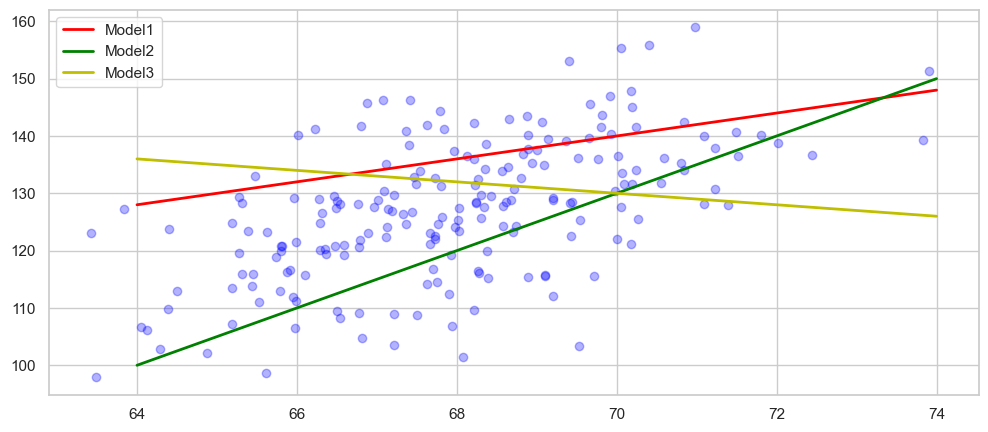

In [10]:
plt.plot(x, y, "o", alpha=0.3, color='blue')

# Setting Model Parameters for 3 Models
model1=[0 + 2*x for x in np.arange(64,75)]
model2=[-220 + 5*x for x in np.arange(64,75)]
model3=[200 - 1*x for x in np.arange(64,75)]

# Let's plot the 3 models
plt.plot(np.arange(64,75), model1,'r', label='Model1')
plt.plot(np.arange(64,75), model2,'g', label='Model2')
plt.plot(np.arange(64,75), model3,'y', label='Model3')
plt.legend()

The objective will always be to $\textbf{minimize}$ the sum of the square of the distance between the real points ($y_j$) and the value of the function ($ŷ_j$)

$$\textbf{ŷ} = a_0+a_1 \textbf{x}$$

If we have the data $(\textbf{x},\textbf{y})$, we want to minimize:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ 

This expression is known as **sum of squared errors of prediction (SSE)**.

The easiest way to find these two parameters is to use the OLS (*Ordinary Least Squares*) algorithm.


Norm and euclidian norm: https://ca.wikipedia.org/wiki/Norma_(matem%C3%A0tiques)

###  1.1 Ordinary Least Squares (OLS)

Let's see an example:

**SciPy library**

SciPy is an open-source Python library used for scientific and technical computing. Built on top of the NumPy library, SciPy provides a wide range of mathematical, scientific, and engineering functionality. It is widely used for tasks that require high-performance numerical computations, including optimization, integration, interpolation, eigenvalue problems, algebraic equations, and statistics.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


![Example Image](Figures/lambda.jpg)


In [11]:

#Choose the number of samples to run this example
n_samples = 500

x =  df.Height_Inches[:n_samples]
y = df.Weight_Pounds[:n_samples]


In [ ]:
from scipy.optimize import fmin
from scipy.optimize import minimize


# Function to minimize
# lambda a, x, y: This is a short way to define a function without explicitly using the def(arguments): keyword. 
    # This lambda function takes three arguments: a, x, and y.
sse = lambda a, x, y: np.sum((y - a[0] - a[1]*x) ** 2) # save sse (function minimize)

# Initial guess for the parameters [intercept, slope]
initial_guess = [0, 1]

result_sse = minimize(sse, initial_guess, args=(x, y))

# Get the optimal parameters
intercept, slope = result_sse.x


print("Optimal a0 (incercept): ", intercept)
print("Optimal a1 (slope): ", slope)


print('\nSSE = ', np.sum((y - intercept - slope*x) ** 2))
print('\nFinal model:\n',round(intercept,2),'+',round(slope,2),'x')

NameError: name 'a' is not defined

In [13]:
result_sse.x

array([-81.06164324,   3.06240872])

(83.3598, 169.229)

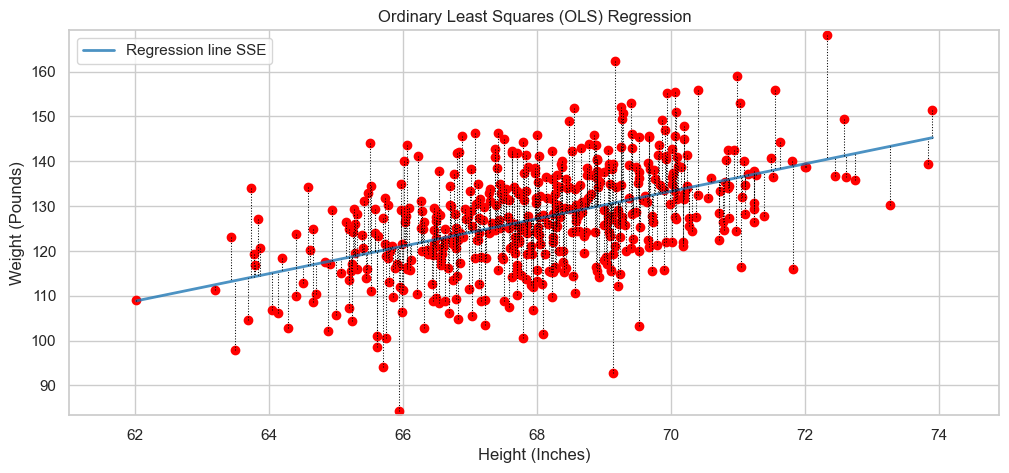

In [14]:
# Plot the data and the linear regression line
plt.plot(x, y, 'ro')  #'ro' red circles
plt.plot([min(x), max(x)], [intercept + slope * min(x), intercept + slope * max(x)], alpha=0.8, label="Regression line SSE")  # Line plot
plt.legend()
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.title("Ordinary Least Squares (OLS) Regression")

for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, intercept + slope*xi], "k:", linewidth=0.75) # show errors
plt.xlim(min(x)-1,  max(x)+1); plt.ylim( min(y)-1,  max(y)+1)


### We could also minimize other values as **sum of the absolute value of the differences**. 

In [15]:

# Function to minimize: the ABSOLUTE error
sabs = lambda a, x, y: np.sum(np.abs(y - a[0] - a[1]*x)) ## function to minize has changed

# Initial guess for the parameters [intercept, slope]
initial_guess = [0, 1]

result_sabs = minimize(sabs, initial_guess, args=(x, y))

# Get the optimal parameters
intercept, slope = result_sabs.x


print("Optimal a0 (incercept): ", intercept)
print("Optimal a1 (slope): ", slope)


print('\nSSE = ', np.sum((y - intercept - slope*x) ** 2))
print('\nAbsolute Errors = ', np.sum(np.abs(y - intercept - slope*x)))
print('\nFinal model:\n',round(intercept,2),'+',round(slope,2),'x')



Optimal a0 (incercept):  -71.85212847211794
Optimal a1 (slope):  2.921918397974829

SSE =  53788.86911008542

Absolute Errors =  4076.0215572357615

Final model:
 -71.85 + 2.92 x


Let's plot the final model

In [16]:
result_sse.x

array([-81.06164324,   3.06240872])

(83.3598, 169.229)

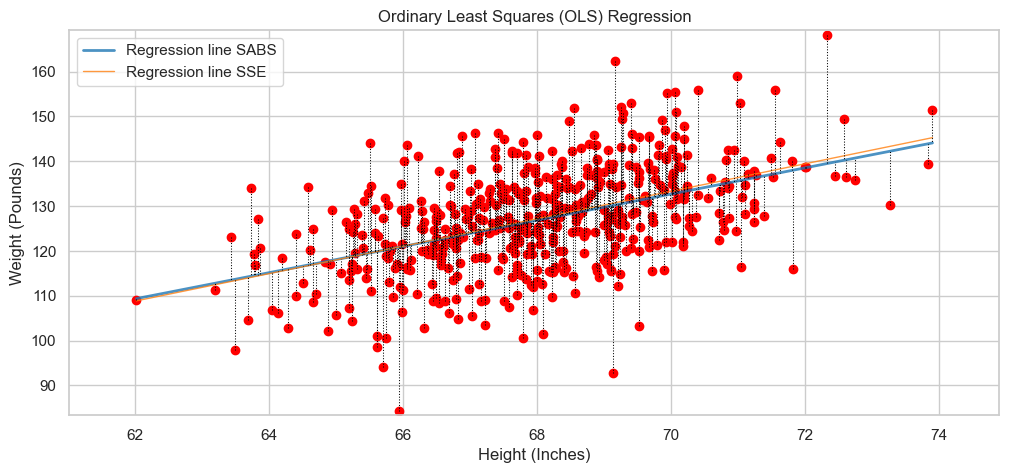

In [17]:

# Plot the data and the linear regression line
plt.plot(x, y, 'ro')  #'ro' red circles
plt.plot([min(x), max(x)], [intercept + slope * min(x), intercept + slope * max(x)], alpha=0.8, label="Regression line SABS")  # Line plot
plt.plot([min(x), max(x)], [result_sse.x[0] + result_sse.x[1] * min(x), result_sse.x[0] + result_sse.x[1] * max(x)], alpha=0.8, label="Regression line SSE", linewidth=1)  
plt.legend()
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.title("Ordinary Least Squares (OLS) Regression")

result_sse.x[0]

for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, intercept + slope*xi], "k:", linewidth=0.75) # show errors
    

plt.xlim(min(x)-1,  max(x)+1); plt.ylim( min(y)-1,  max(y)+1)


In this case, we penalize less for distant values.

Advantages OLS

+ Computationally easy to calculate for small datasets. For larger datasets the computation of an inverse causes an increase in computation time.
+ Easy to interpret

And the model obtained is:

$$\widehat{\textbf{y}} = \widehat{a}_0+\widehat{a}_1 \textbf{x}$$

Hats indicate that these are estimated values.

# 2. Linear Regression with Sklearn

Luckily, we don't have to develop these algorithms ourselves from scratch. That's what machine learning libraries are already made for!

For example, let's see how easy it is to create a linear regression model in Sklearn by loading a sample dataset from the library:

In [18]:
from sklearn.model_selection import train_test_split

X = x.values.reshape(-1, 1)  # transform in 2D
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 850)

In [19]:
X_train.shape

(400, 1)

In [20]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression() #uses ordinary least squares regression

# train
regr.fit(X_train, y_train) # Fit linear model

# Check model
print('a1 : \n', regr.coef_) #\n for new line
print('a0 : \n', regr.intercept_)

a1 : 
 [3.00429155]
a0 : 
 -76.84532813163385


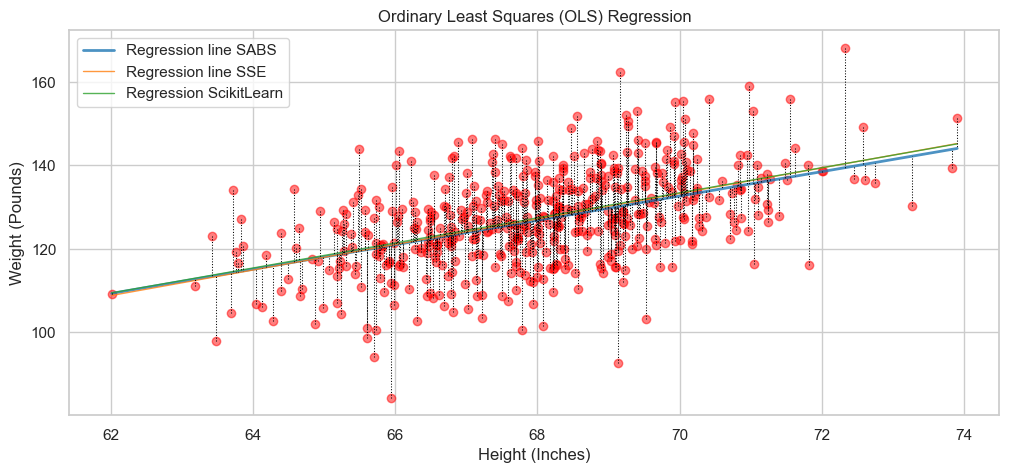

In [21]:

# Plot the data and the linear regression line
plt.plot(x, y, 'ro', alpha = 0.5)  #'ro' red circles
plt.plot([min(x), max(x)], [intercept + slope * min(x), intercept + slope * max(x)], alpha=0.8, label="Regression line SABS")  # Line plot
plt.plot([min(x), max(x)], [result_sse.x[0] + result_sse.x[1] * min(x), result_sse.x[0] + result_sse.x[1] * max(x)], alpha=0.8, label="Regression line SSE", linewidth=1)
plt.plot([min(x), max(x)], [regr.intercept_ + regr.coef_ * min(x), regr.intercept_ + regr.coef_ * max(x)], alpha=0.8, label="Regression ScikitLearn", linewidth=1)  
plt.legend()
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.title("Ordinary Least Squares (OLS) Regression")


for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, intercept + slope*xi], "k:", linewidth=0.75) # show errors



Once the model is obtained with Scikit Learn, we can also make predictions directly:

In [22]:
y_pred = regr.predict(X_test)
y_pred

array([131.05759595, 120.78691455, 123.06056239, 125.43909006,
       130.71543719, 136.77124776, 130.76155306, 125.33069522,
       122.74051521, 123.49324046, 131.24872898, 133.39947126,
       118.05610365, 127.34930876, 120.00408629, 129.39709397,
       131.75444138, 137.63236785, 123.07152806, 124.43989273,
       124.85349355, 132.42773316, 126.9859397 , 126.43083675,
       120.31148541, 139.47958656, 132.02293492, 120.54594032,
       125.64284111, 123.20161388, 128.18314988, 126.29642474,
       127.37027871, 130.56083635, 130.43555739, 132.86035114,
       130.60361746, 129.46685362, 131.26128692, 123.54686707,
       126.86669936, 138.00721331, 127.74485379, 135.58344101,
       125.16026176, 120.25251116, 136.34187441, 125.28193557,
       123.88415888, 135.64851397, 124.72076395, 120.77432656,
       131.98105509, 135.98703754, 131.27363456, 129.15563906,
       120.53629654, 126.3290213 , 128.26868206, 121.31678145,
       126.71197835, 129.29005106, 126.93742039, 133.49

## Evaluation metrics

The model obtained can be evaluated by calculating the **mean squared error** ($MSE$) and the **coefficient of determination** $R^2$.

The MSE is calculated as:

$$MSE=\frac{1}{n} \sum_{i=1}^n (\widehat{y}^i-y^i)^2,$$ 

The coefficient $R^2$ is defined as follows:

$$(1 - \textbf{u}/\textbf{v})$$ 

where $\textbf{u}$ is the sum of the squares of the errors: $\textbf{u}=\sum (\textbf{y} - \widehat{\textbf{y}} )^2$ where ${\textbf{y}}$ are the observed values and $\widehat{\textbf{y}}$ are the predicted values.

and $\textbf{v}$ is: $$\textbf{v}=\sum (\textbf{y} - \bar{\textbf{y}})^2,$$ where $\bar{\textbf{y}}$ is the mean of the observed data.

In Sklearn, we could do:

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))

print('Root Mean squared error (RMSE): %.2f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('R2_score: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error (MSE): 121.64
Root Mean squared error (RMSE): 11.03
R2_score: 0.22


In [24]:
residual = y_test-y_pred
residual

84     -1.956296
0      -7.794415
324    14.775738
51      0.889410
310    -7.371337
         ...    
397   -10.108120
13     -2.330586
173     0.246161
409     5.934972
401    -4.004912
Name: Weight_Pounds, Length: 100, dtype: float64

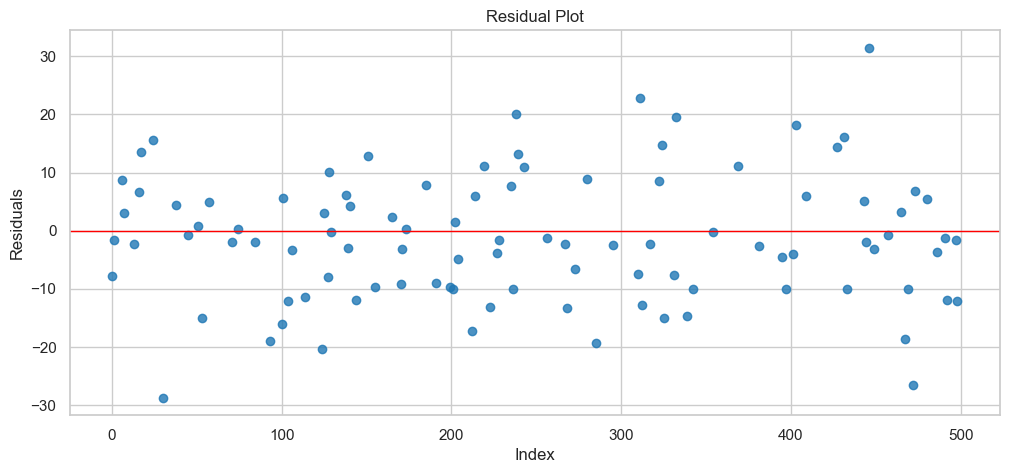

In [25]:

# Plot the data and the linear regression line

plt.scatter(residual.index, residual, alpha=0.8, label="", linewidth=1)  

# Draw a solid line at y=0
plt.axhline(0, color='red', linestyle='-', linewidth=1)

# Add labels and title (optional)
plt.title('Residual Plot')
plt.xlabel('Index')
plt.ylabel('Residuals')

plt.show()


Visualization

We can use Seaborn's ``lmplot()`` function to visualize linear relationships of multidimensional datasets. The input must be in *Pandas* .

## Example:  Macroeconomic dataset


It contains U.S. macroeconomic data from 1947 to 1962, specifically focusing on factors that may influence employment numbers.

* Year: The year the data was collected.
* Employed: The number of people employed (in thousands).
* GNP.deflator: The gross national product implicit price deflator (1954 = 100).
* GNP: The gross national product (in millions of dollars).
* Unemployed: The number of people unemployed (in thousands).
* Armed.Forces: The size of the armed forces (in thousands).
* Population: The population of the U.S. (in thousands).

In [ ]:
import pandas as pd
import seaborn as sns
# Read data
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/d atasets/longley.csv', index_col=0)
df.head()
df.describe()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
count,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,101.681250,387.698437,319.331250,260.66875,117.424000,1954.500000,65.317000
std,10.791553,99.394938,93.446425,69.59196,6.956102,4.760952,3.511968
min,83.000000,234.289000,187.000000,145.60000,107.608000,1947.000000,60.171000
25%,94.525000,317.881000,234.825000,229.80000,111.788500,1950.750000,62.712500
50%,100.600000,381.427000,314.350000,271.75000,116.803500,1954.500000,65.504000
75%,111.250000,454.085500,384.250000,306.07500,122.304000,1958.250000,68.290500
max,116.900000,554.894000,480.600000,359.40000,130.081000,1962.000000,70.551000


In [27]:
df

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
rownames,,,,,,,
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639
1953,99.0,365.385,187.0,354.7,115.094,1953,64.989
1954,100.0,363.112,357.8,335.0,116.219,1954,63.761
1955,101.2,397.469,290.4,304.8,117.388,1955,66.019


Macroeconomic data from 1947 to 1962.

We want to predict ('Employed') as response $\textbf{y}$ using ('GNP') as predictor $\textbf{x}$.



``lmplot`` is a function from the ``seaborn`` library that stands for "Linear Model Plot". It's a versatile function for visualizing data along with a linear regression model, which can be either a simple linear regression or a more complex polynomial regression, depending on how you use it.

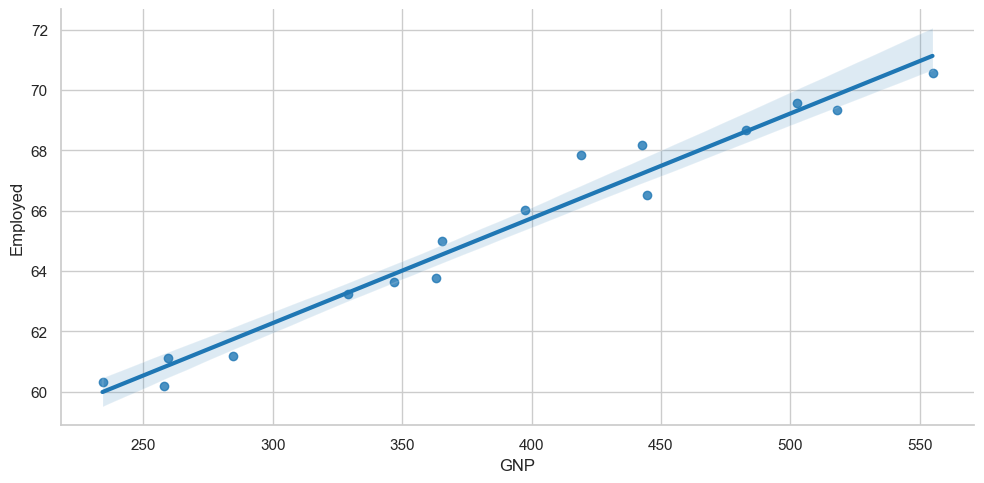

In [28]:
sns.lmplot(x="GNP", y="Employed", data=df, aspect=2)

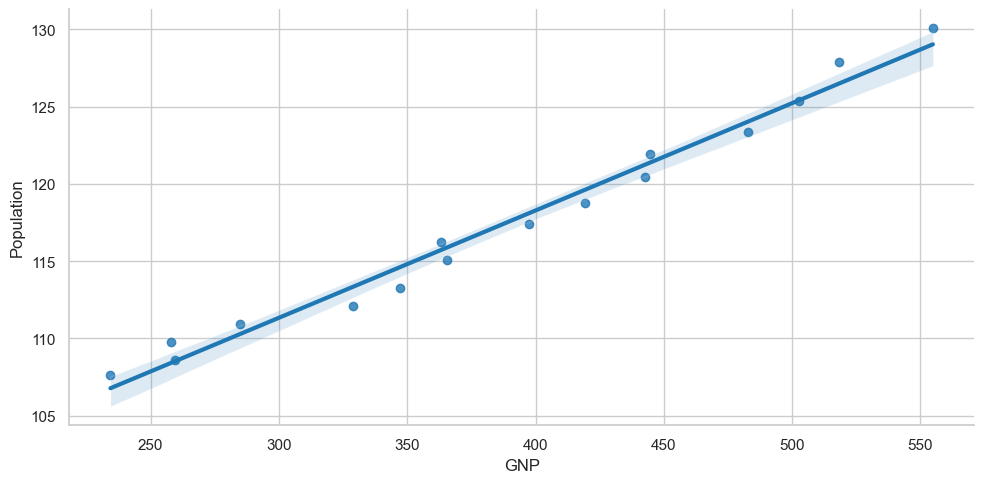

In [29]:
sns.lmplot(x="GNP", y="Population", data=df, aspect=2)

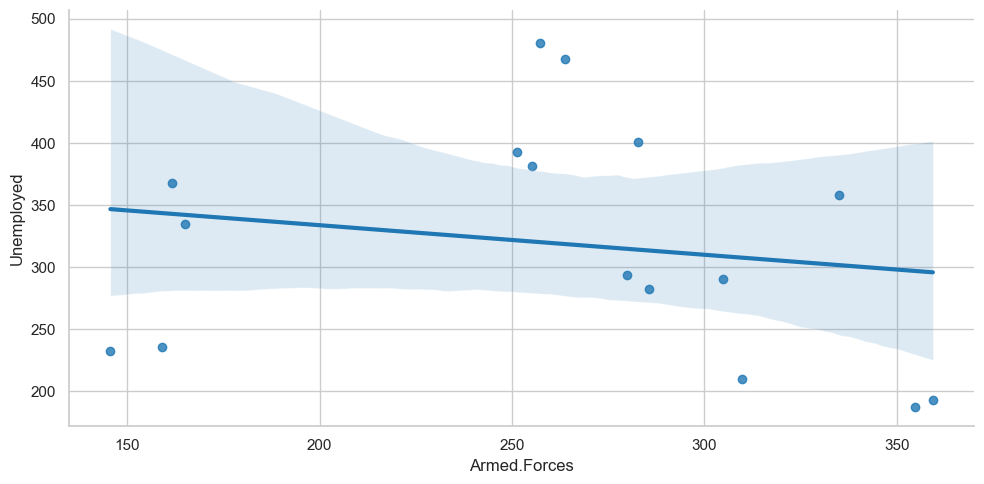

In [48]:
sns.lmplot(x="Armed.Forces", y="Unemployed", data=df, aspect=2)

We see that there are parts that are not very "linear".

For this we can use polynomial regression.

## 3. Polynomial Regression




Although it is called *linear* regression, we can also fit non-linear functions. The regression will be linear in its parameters not necessarily in its predictors. If nonlinear transformations are added to the linear regression model, the model may become nonlinear

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

This technique is known as *Polynomial Regression*, where the higher the degree of the polynomial applied the more complex the model can be (watch out for overfitting!!! and computation time!!!).

For example, a cubic model:

$$y_i \approx a_0 + a_1 x_i + a_2 x_i^2 + a_3 x_i^3$$

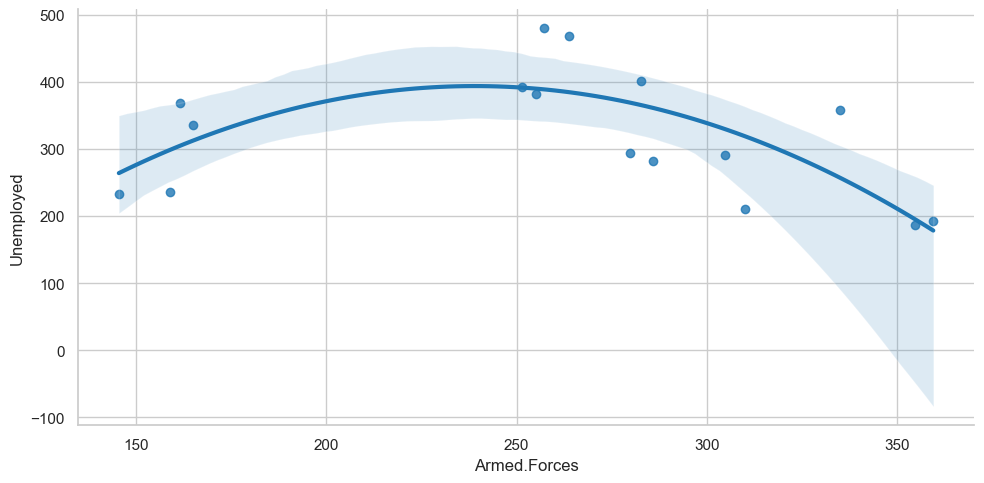

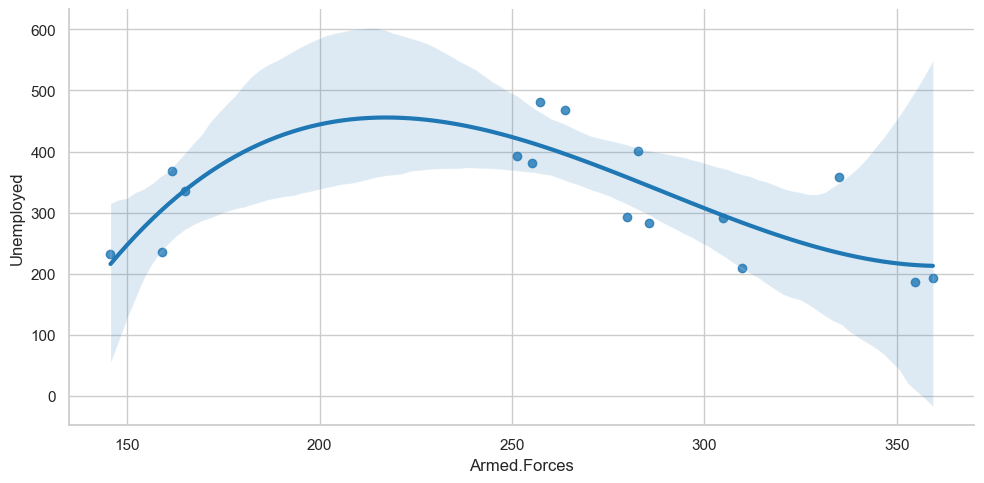

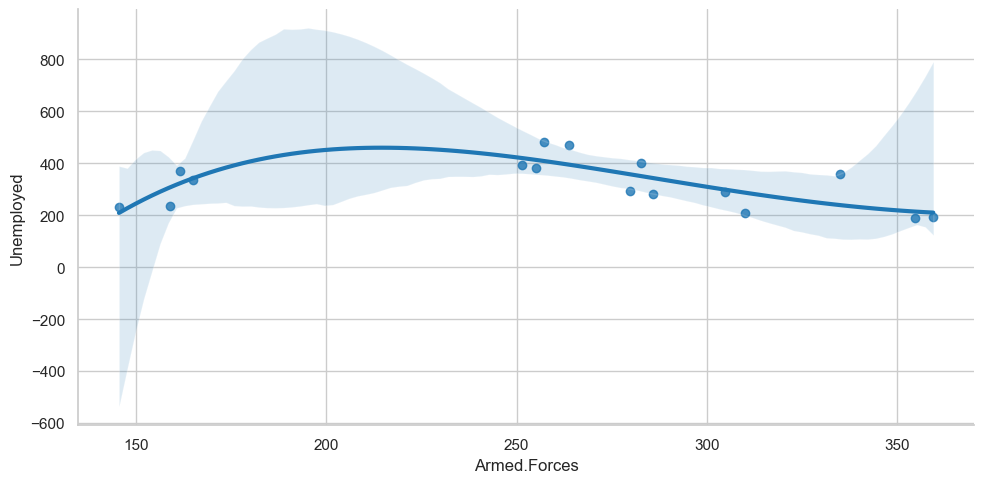

In [31]:
# Increase the order to estimate a polynomial regression
sns.lmplot(x="Armed.Forces", y="Unemployed", data=df, order=2, aspect=2)
sns.lmplot(x="Armed.Forces", y="Unemployed", data=df, order=3, aspect=2)
sns.lmplot(x="Armed.Forces", y="Unemployed", data=df, order=4, aspect=2)